In [1]:
import numpy as np
import pandas as pd
import glob, os    
import matplotlib.pyplot as plt

In [2]:
# 2019 data
electricity_data_2019 = pd.read_csv("dataset/electricity_data_2019.csv", index_col=None, header=0)
# 2020 data
electricity_data_2020 = pd.read_csv("dataset/electricity_data_2020.csv", index_col=None, header=0)

In [3]:
electricity_data_2019

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2019/02/01 00:30:00,4012.27,100.97,TRADE
1,VIC1,2019/02/01 01:00:00,3879.38,86.00,TRADE
2,VIC1,2019/02/01 01:30:00,3810.66,113.73,TRADE
3,VIC1,2019/02/01 02:00:00,3683.81,95.01,TRADE
4,VIC1,2019/02/01 02:30:00,3656.39,82.59,TRADE
...,...,...,...,...,...
11659,VIC1,2019/07/31 22:00:00,6110.77,104.43,TRADE
11660,VIC1,2019/07/31 22:30:00,5770.16,104.04,TRADE
11661,VIC1,2019/07/31 23:00:00,5520.57,102.62,TRADE
11662,VIC1,2019/07/31 23:30:00,5619.90,104.34,TRADE


In [4]:
electricity_data_2020

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2020/07/01 00:30:00,5004.56,38.59,TRADE
1,VIC1,2020/07/01 01:00:00,4875.82,37.35,TRADE
2,VIC1,2020/07/01 01:30:00,4757.59,35.66,TRADE
3,VIC1,2020/07/01 02:00:00,4584.00,28.97,TRADE
4,VIC1,2020/07/01 02:30:00,4414.86,20.46,TRADE
...,...,...,...,...,...
32347,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
32348,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
32349,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
32350,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [5]:
electricity_data_2019['SETTLEMENTDATE'] = pd.to_datetime(electricity_data_2019['SETTLEMENTDATE'])
electricity_data_2019 = electricity_data_2019[electricity_data_2019['SETTLEMENTDATE'] < '2019-09-01']
electricity_data_2019.sort_values(by='SETTLEMENTDATE')
electricity_data_2019 = electricity_data_2019.groupby(pd.Grouper(key='SETTLEMENTDATE', freq='1H')).sum()
electricity_data_2019
electricity_data_2019['TOTALDEMAND'].mean()

10097.934958847738

In [6]:
electricity_data_2020['SETTLEMENTDATE'] = pd.to_datetime(electricity_data_2020['SETTLEMENTDATE'])
electricity_data_2020 = electricity_data_2020[electricity_data_2020['SETTLEMENTDATE'] < '2020-09-01']
electricity_data_2020.sort_values(by='SETTLEMENTDATE')
electricity_data_2020 = electricity_data_2020.groupby(pd.Grouper(key='SETTLEMENTDATE', freq='1H')).sum()
electricity_data_2020
electricity_data_2020['TOTALDEMAND'].mean()

27373.47230191257

In [7]:
electricity_data_2019 = electricity_data_2019.reset_index()
electricity_data_2019

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,2019-01-01 00:00:00,4286.24,71.49
1,2019-01-01 01:00:00,8185.31,146.90
2,2019-01-01 02:00:00,7644.24,138.84
3,2019-01-01 03:00:00,7291.20,126.95
4,2019-01-01 04:00:00,7186.07,101.07
...,...,...,...
5827,2019-08-31 19:00:00,11038.99,356.32
5828,2019-08-31 20:00:00,10632.05,261.58
5829,2019-08-31 21:00:00,10198.26,222.44
5830,2019-08-31 22:00:00,9703.40,222.48


In [8]:
electricity_data_2019['SETTLEMENTDATE'] = electricity_data_2019['SETTLEMENTDATE'].dt.time
electricity_data_2019

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,00:00:00,4286.24,71.49
1,01:00:00,8185.31,146.90
2,02:00:00,7644.24,138.84
3,03:00:00,7291.20,126.95
4,04:00:00,7186.07,101.07
...,...,...,...
5827,19:00:00,11038.99,356.32
5828,20:00:00,10632.05,261.58
5829,21:00:00,10198.26,222.44
5830,22:00:00,9703.40,222.48


In [9]:
electricity_data_2019.set_index('SETTLEMENTDATE')
electricity_data_2019 = electricity_data_2019.groupby(['SETTLEMENTDATE']).sum()
electricity_data_2019

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
00:00:00,2320412.48,50281.18
01:00:00,2160947.13,41503.83
02:00:00,2023895.09,36135.71
03:00:00,1943663.71,32711.58
04:00:00,1937351.69,32610.34
05:00:00,2023958.68,37064.70
06:00:00,2241150.59,47022.22
07:00:00,2485912.44,60687.64
08:00:00,2612697.49,58885.05


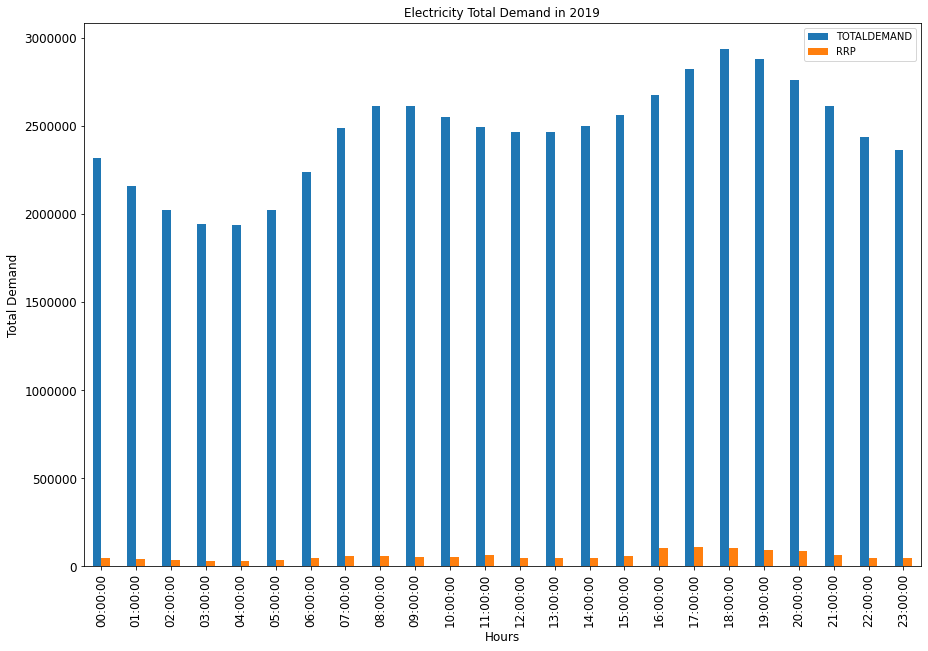

In [10]:
ax = electricity_data_2019.plot(kind='bar', title ="Electricity Total Demand in 2019", figsize=(15, 10), legend=True, fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Total Demand", fontsize=12)
plt.show()

In [11]:
electricity_data_2020 = electricity_data_2020.reset_index()
electricity_data_2020

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,2020-01-01 00:00:00,12555.96,194.28
1,2020-01-01 01:00:00,24037.59,385.71
2,2020-01-01 02:00:00,22444.74,383.04
3,2020-01-01 03:00:00,21459.69,369.27
4,2020-01-01 04:00:00,20986.65,336.21
...,...,...,...
5851,2020-08-31 19:00:00,39880.83,845.85
5852,2020-08-31 20:00:00,37855.86,382.08
5853,2020-08-31 21:00:00,35544.39,363.03
5854,2020-08-31 22:00:00,32993.70,396.36


In [12]:
electricity_data_2020['SETTLEMENTDATE'] = electricity_data_2020['SETTLEMENTDATE'].dt.time
electricity_data_2020

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,00:00:00,12555.96,194.28
1,01:00:00,24037.59,385.71
2,02:00:00,22444.74,383.04
3,03:00:00,21459.69,369.27
4,04:00:00,20986.65,336.21
...,...,...,...
5851,19:00:00,39880.83,845.85
5852,20:00:00,37855.86,382.08
5853,21:00:00,35544.39,363.03
5854,22:00:00,32993.70,396.36


In [13]:
electricity_data_2020.set_index('SETTLEMENTDATE')
electricity_data_2020 = electricity_data_2020.groupby(['SETTLEMENTDATE']).sum()
electricity_data_2020

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
00:00:00,6465179.85,65608.77
01:00:00,6044177.57,56411.26
02:00:00,5643632.03,47107.71
03:00:00,5387692.07,39747.20
04:00:00,5340971.15,39123.90
05:00:00,5542950.75,45881.07
06:00:00,6076898.87,58189.96
07:00:00,6698447.31,71545.06
08:00:00,7122763.09,78692.29


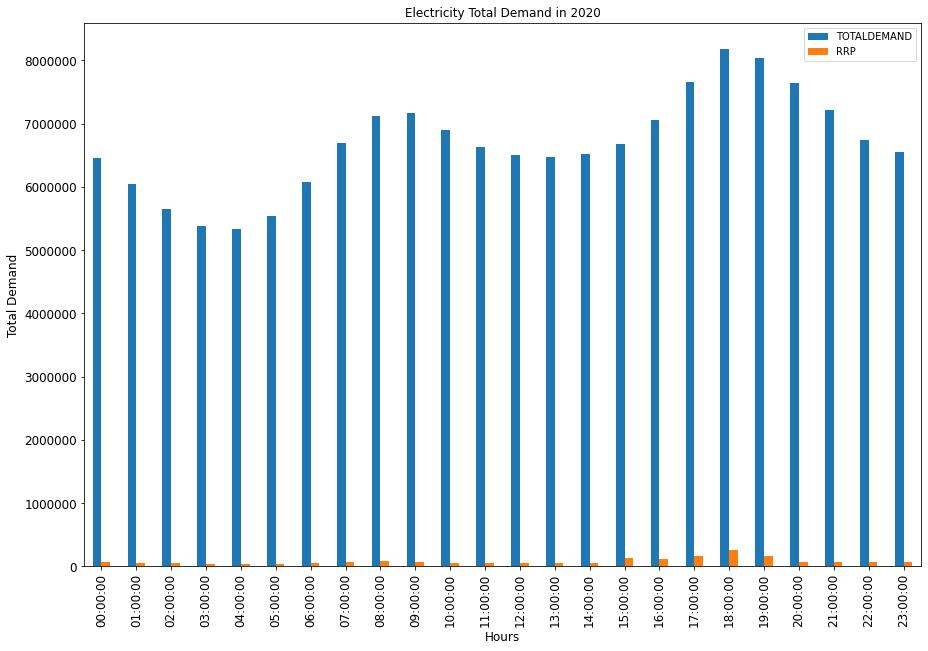

In [14]:
ax = electricity_data_2020.plot(kind='bar', title ="Electricity Total Demand in 2020", figsize=(15, 10), legend=True, fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Total Demand", fontsize=12)
plt.show()